# chapter05. 서포트벡터머신
1. 선형SVM분류
 - 소프트마진 분류(=비분리 SVM)
 - 하드마진 분류(=분리 SVM)
2. 비선형 SVM 분류
 - 커널법을 사용한 비선형 SVM
3. SVM 회귀
 - 선형 SVM회귀
 - 비선형 SVM회귀
4. SVM 이론
 - 분류기, 회귀, 온라인 SVM

**분류문제에 SVM을 사용할 경우, 가장먼저 선형커널(선형SVM)을 사용해야 한다. 선형SVM의 성능이 낮을 경우 즉 데이터가 비선형일 경우, 가우시안 RBF 커널을 시도해본다. (+feature scaling+GridSearchCV+cross_val_score)**

SVM의 분류의 원리는 각 그룹에서 데이터간의 거리를 측정하여 중심을 구한 후 그 가운데서 초평면을 구함으로써 그룹을 예측하는 방법을 의미한다. 
SVM의 가장 큰 장점은 비선형 분류에서 효과적인 성능을 보인다는 점이다. ‘커널함수’를 사용하여 Feature Space라는 새로운 공간에 선형판별을 수행함으로써 실제 데이터에서는 매우 복잡한 비선형 판별의 수행이 가능하다. 

### 5.1. 선형 SVM 분류
SVM은 매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델이다. 특히 복잡한 분류모델에 잘 들어맞으며 작거나 중간크기의 데이터셋에 적합하다. <br>

- SVM은 이항분류의 문제를 위해 만들어졌다. 
- 클래스들이 linear boundary에 의해 분리될 수 있는 데이터만을 요구하기 때문에 대부분의 데이터에 적용되기 힘들다.
- 결정영역의 초평면을 둘러싼 margin을 최대화시키려고 한다. 
- class 결정함수는 test data의 support vector만으로 완전히 설명이 가능하다,
- SVM의 결정함수를 구하는 것은 함수의 최적화 문제 

선형 SVM의 경우, l**inear decision boundary를 찾는 경우**와 비슷하다. 다만 두 분류 label간의 거리가 가장 멀도록 해야하고 이를 **라지 마진 분류**라고 한다. 
SVM 모델을 특성의 스케일에 민감하므로, **feature scaling**이 필수적이다. StandardScaler(), MinmaxScaler(), RobustScaler()이 필요하다. 

#### 5.1.1. 소프트 마진 분류
- **hard margin classification** : 초평면에 의해 완벽하게 분리되는 경우<br>


- **soft margin classification** : 하드마진모델보다 유연한 형태의 모델, '도로의 폭을 가능한 넓게 유지하려는 것'과 '마진오류'사이에 적절한 균형을 잡고자 하는 모델을 의미한다. sklearn에서의 SVM에서는 hyper parameter C의 조절을 통해 일반화가능성이 높은 것을 채택한다. <br>
𝑥𝑖∗𝑤+𝑏>=1−𝜂𝑖 (for y=1)  <br>
𝑥𝑖∗𝑤+𝑏<=1+𝜂𝑖  (for y=-1) <br>
와 같이 오분류율 $\eta$를 사용하며 margin의 최대화와 오분류율의 상한선을 tradeoff관계로 가진다. 이를 조절하는 
C는 hyperparameter로 오분류율의 상한선을 조정하는 역할이다. C가 높아지면 오분류율도 같이 높아진다. 

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=datasets.load_iris()
X=iris['data'][:, (2,3)] #꽃잎의 길이, 꽃잎의 너비를 x로 지정
y=(iris["target"]==2).astype(np.float64) #iris-Virginica

In [4]:
#pipeline은 단계적인 전처리단계를 밟을 때 사용한다 
#전처리는 동일하나, CV가 반복적으로 이루어져야 하는 경우 전처리의 간소화를 위해 사용된다. 
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1,loss='hinge'))
])

In [5]:
svm_clf.fit(X,y) #SVM 모델 학습

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [8]:
svm_clf.predict([[5.5,1.7]]) #(x,y)값에 대한 예측

array([1.])

regularization setting에 따라 결과가 어떻게 바뀌는지를 확인한다. (오분류율 상한선 C조절 확인하기)

In [9]:
scaler = StandardScaler()
svm_clf1=LinearSVC(C=1, loss='hinge', random_state=42)
svm_clf2=LinearSVC(C=100, loss='hinge', random_state=42)

In [16]:
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ]) #C=1인 경우 적용

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ]) #C=100인 경우 적용

In [17]:
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [18]:
#decision boundary를 구하기 위한 변수 지정
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

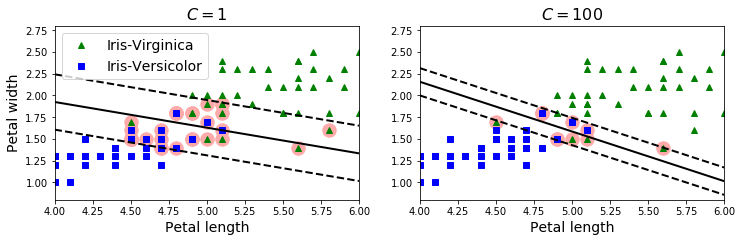

In [22]:
import matplotlib.pyplot as plt
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
    
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

### 5.2. 비선형 SVM분류

**커널법** = 비선형 데이터를 분류하기 위해 유클리드 공간에 mapping하는 방법.(저차원에서 분리되지 않았던 것들을 고차원으로 향상시킴으로서 선형분리가 가능하게 되므로) <br>
아래는 커널의 식을 나타내며 이 자체로 학습알고리즘으로 사용된다 

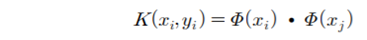

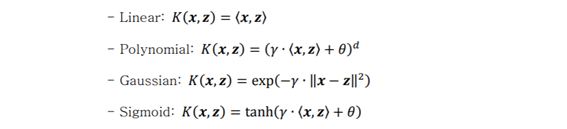

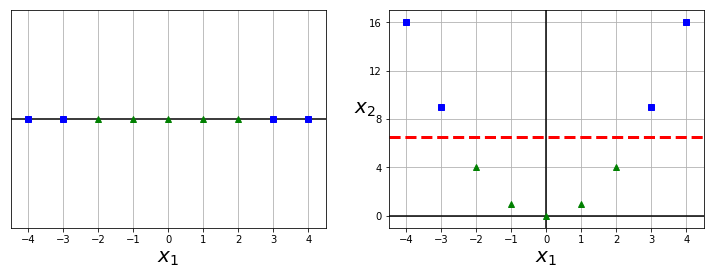

In [24]:
#고차원으로 mapping시킴으로서 선형분리가 가능해진다는 점을 나타낸다. 
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

In [27]:
#다항특성을 나타낸 선형 SVM 분류기
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

make_moons #sample genderator function을 의미한다. 

<function sklearn.datasets._samples_generator.make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)>

In [36]:
X,y=make_moons(n_samples=100, noise=0.15, random_state=42)#값이 array형태로 배열 되므로 X,y,값으로 배열한다. 

In [38]:
#전처리 과정을 pipeline으로 한번에 정리하는 경우
import warnings
warnings.filterwarnings('ignore')
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

degree에 따른 즉  어느정도의 차원을 나눠야 하는가

In [41]:
#prediction 시각화
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

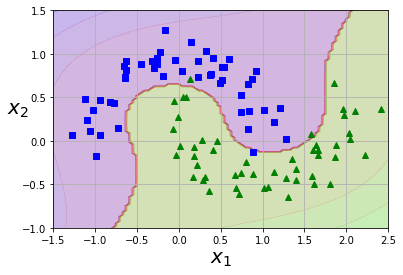

In [42]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

### 5.2.1 다항식 커널

일반적으로 고차원으로 이동하는 것은 간단하면서 비선형 문제를 해결해 줄 수 있는 좋은 방법이다. 하지만 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게 한다.

In [43]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [44]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

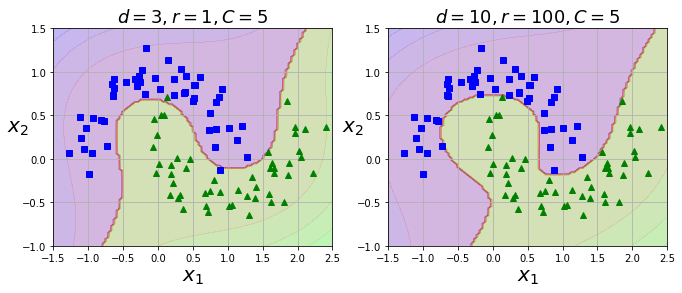

In [45]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.show()

In [94]:
#성능비교, 최적의 하이퍼파라미터 보기
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler()
scaler.fit(X,y)

params_grid=[
    {'degree':[3,5,10], 'C':[5,10,15]}
]
poly_kernel_svm_clf = SVC(kernel="poly")
grid_search=GridSearchCV(poly_kernel_svm_clf, param_grid=params_grid, cv=5)

grid_search.fit(X,y)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [5, 10, 15], 'degree': [3, 5, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
print(grid_search.best_params_)

{'C': 5, 'degree': 3}


In [98]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

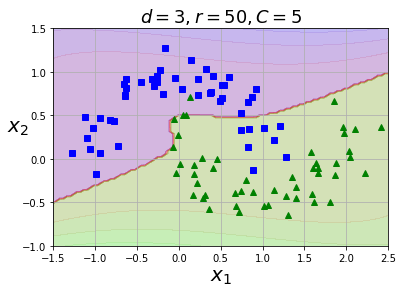

In [100]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=50, C=5$", fontsize=18)
plt.show()

### 5.2.2. 유사도 특성 추가
커널법의 종류인 방법들의 경우, 단순히 커널법을 사용한다. 하지만 가우시안 커널법의 경우는 특이하게도 '유사도 함수'를 사용하여, 랜드마크와 얼마나 닮았는지를 알려주게 한다. 

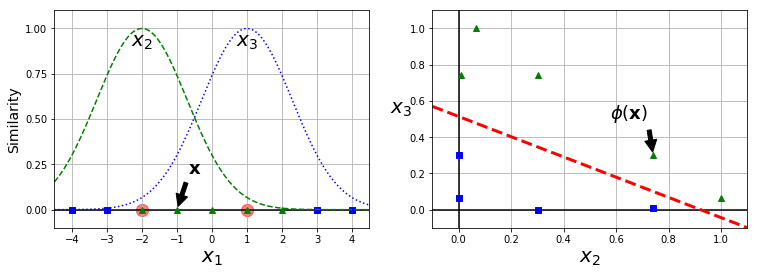

In [102]:
#가우시안 커널법의 원리
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
plt.show()

### 5.2.3. 가우시안 RBF커널
커널 트릭 알고리즘으로 유사도 특성을 실제로 추가하지 않고도 추가한 효과를 낼 수 있도록 해준다.-성능향상 <br>
커널 종류를 선택하는 방법은 성능평가로 따진다. (가우시안이 좋다는 보장은 없다)<br>
다만 커널 종류별 hyperparameter조절시에는 반드시 위의 공식을 참고하고, GridSearchCV()로 best parans을 찾자

In [104]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

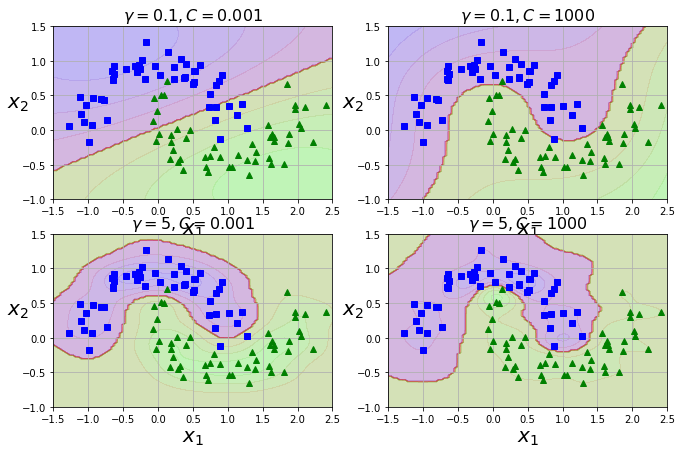

In [106]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

hyperparameter $\gamma$는 규제의 역할을 한다. 즉 선형 SVM에서의 C의 역할과 비슷하다고 본다. gamma가 크면 (=C가 크면) 오류율의 상한선이 큰 형태이므로, 오류는 있되 RBF를 더 유지하려는 경향이 있다고 본다. <br>
위의 그림을 참고하면 $\gamma$가 크면 데이터에 맞게 더 구불구불한 decision_boundary가 생긴다. 즉 과적합율이 높아진다. 따라서 $\gamma$는 과적합에 따라 조절해야 하는 hyperparameter이다. 

### 5.3.  회귀
회귀에 적용하는 방법은 분류와는 목표를 반대로 한다. 일정한 마진오류 안에서 두 클래스 간의 **도로 폭이 가능한 최대가 되도록 하는 대신, SVM회귀는 제한된 마진오류 안에서 도로 안에 가능한 많은 샘플이 들어가도록** 하는 것이다. 도로 폭은 하이퍼 파라미터 $\epsilon$로 조절한다. <br>
일반적인 회귀와 다른 점은 margin까지의 거리인 $\epsilon$이 존재한다는 점이다. 

In [112]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [113]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [114]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

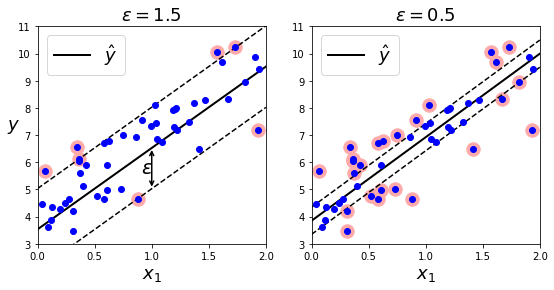

In [115]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()

**비선형 SVM**을 사용하는 경우엔 분류문제와 비슷하게 커널 SVM 모델을 사용한다. 규제함수 C에 따라 regularzation을 조절한다. 또한 $\epsilon$값은 모델에 많은 영향을 주지 않기 때문에 고정하고 간다.

In [116]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', gamma='auto', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [123]:
#비선형 커널법에서 C를 조절하여 오분류율을 지정하는 경우
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

C=100인 경우는 규제가 거의 없고(오분류율이 크고) C=0.01의 경우는 그래프의 규제가 훨씬 많다(오분류율이 작다)

### 5.4. SVM이론
- hwp파일 참고하기